In [3]:
import matplotlib.pyplot as plt
import time
import pandas as pd
import string
import random


In [24]:
from sort import heapsort, mergesort, quicksort, radix_sort_strings
from test import generateRandomNumberList

In [32]:
quick, merge, heap = [], [], []
values = []
for n in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    values.append(n)
    to_order = generateRandomNumberList(n, 0, 1000000)
    
    startTime = time.time()
    quicksort(to_order)
    quick.append(time.time()-startTime)
    
    startTime = time.time()
    mergesort(to_order)
    merge.append(time.time()-startTime)

    startTime = time.time()
    heapsort(to_order)
    heap.append(time.time() - startTime)

In [7]:
n

292051

In [13]:
print(len(quick))
print(len(merge))
print(len(heap))

29205
29205
29205


In [16]:
print(len(values))

29205


In [18]:
data = {
    'values':values,
    'mergesort':merge,
    'heapsort': heap,
    'quicksort': quick
}
df = pd.DataFrame(data)

In [19]:
df.head()

,values,mergesort,heapsort,quicksort
0,1,0.000002,0.000002,0.000002
1,11,0.000019,0.000024,0.000016
2,21,0.000034,0.000050,0.000026
3,31,0.000048,0.000085,0.000042
4,41,0.000139,0.000134,0.000047


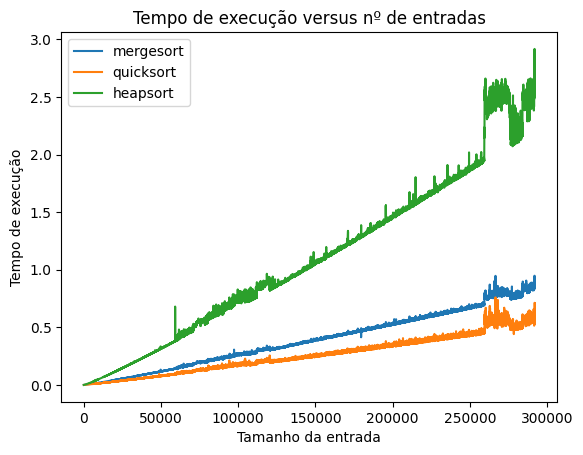

In [31]:
plt.plot(df['values'], df['mergesort'],label='mergesort')
plt.plot(df['values'], df['quicksort'],label='quicksort')
plt.plot(df['values'], df['heapsort'],label='heapsort')
plt.title('Tempo de execução versus nº de entradas')
plt.xlabel('Tamanho da entrada')
plt.ylabel('Tempo de execução')
plt.legend()
plt.savefig('images/experiment-1.png')
plt.show()


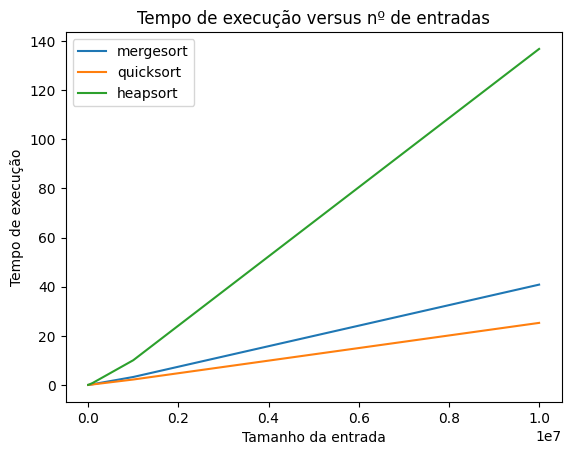

In [33]:
data = {
    'values':values,
    'mergesort':merge,
    'heapsort': heap,
    'quicksort': quick
}
df = pd.DataFrame(data)

plt.plot(df['values'], df['mergesort'],label='mergesort')
plt.plot(df['values'], df['quicksort'],label='quicksort')
plt.plot(df['values'], df['heapsort'],label='heapsort')
plt.title('Tempo de execução versus nº de entradas')
plt.xlabel('Tamanho da entrada')
plt.ylabel('Tempo de execução')
plt.legend()
plt.savefig('images/experiment-2.png')
plt.show()


# Tests for name field

In [7]:
def counting_sort_strings(strings, max_len):   

    strings = [s.ljust(max_len) for s in strings]

    for i in range(max_len - 1, -1, -1):
        count = [0] * 256

        for s in strings:
            char = ord(s[i])
            count[char] += 1

        for j in range(1, 256):
            count[j] += count[j - 1]

        output = [''] * len(strings)
        for s in reversed(strings):
            char = ord(s[i])
            output[count[char] - 1] = s
            count[char] -= 1

        strings = output

    sorted_strings = [s.rstrip() for s in strings]
    return sorted_strings

In [8]:
unsorted_strings = ['apple', 'irmão banana', 'cherry lipstick', 'date', 'grape']
print("Unsorted Strings:", unsorted_strings)

sorted_strings = counting_sort_strings(unsorted_strings, 20)
print("Sorted Strings:", sorted_strings)

Unsorted Strings: ['apple', 'irmão banana', 'cherry lipstick', 'date', 'grape']
Sorted Strings: ['apple', 'cherry lipstick', 'date', 'grape', 'irmão banana']


In [9]:
def heapify(strings, n, i):
    largest = i  # Initialize the largest as the root
    left_child = 2 * i + 1  # Left child
    right_child = 2 * i + 2  # Right child

    # Check if the left child exists and is greater than the root
    if left_child < n and strings[i] < strings[left_child]:
        largest = left_child

    # Check if the right child exists and is greater than the largest so far
    if right_child < n and strings[largest] < strings[right_child]:
        largest = right_child

    # If the largest element is not the root, swap them
    if largest != i:
        strings[i], strings[largest] = strings[largest], strings[i]
        # Recursively heapify the affected sub-tree
        heapify(strings, n, largest)

def heap_sort_strings(strings):
    n = len(strings)

    # Build a max-heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(strings, n, i)

    # Extract elements one by one
    for i in range(n - 1, 0, -1):
        strings[i], strings[0] = strings[0], strings[i]  # Swap
        heapify(strings, i, 0)

In [10]:
unsorted_strings = ['apple', 'irmão banana', 'cherry lipstick', 'date', 'grape']
print("Unsorted Strings:", unsorted_strings)
heap_sort_strings(unsorted_strings)
print("Sorted Strings:", unsorted_strings)

Unsorted Strings: ['apple', 'irmão banana', 'cherry lipstick', 'date', 'grape']
Sorted Strings: ['apple', 'cherry lipstick', 'date', 'grape', 'irmão banana']


In [11]:
def generateRandomNamesList(n, max_len=20):
    characters = string.ascii_letters
    list_names = []
    for _ in range(n):
        list_names.append(''.join(random.choice(characters) for i in range(max_len)))
    return list_names

In [15]:
counting_times = []
heap_times = []
values = [i for i in range(10, 1000000, 50000)]
MAX_LEN = 20
for n in values:
    names = generateRandomNamesList(n, MAX_LEN)
    startTime = time.time()
    counting_sort_strings(names, MAX_LEN)
    counting_times.append(time.time()-startTime)
    startTime = time.time()
    heap_sort_strings(names)
    heap_times.append(time.time()-startTime)
    

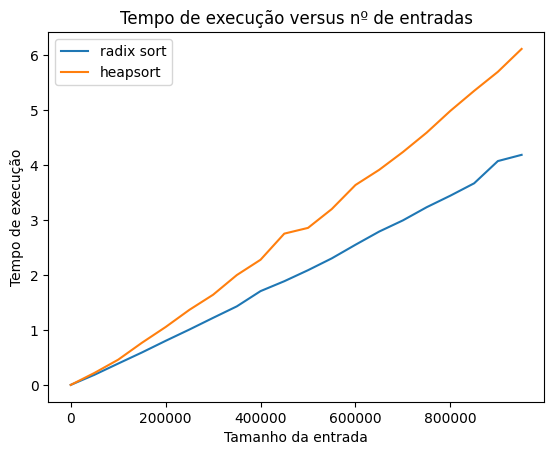

In [16]:
plt.plot(values, counting_times,label='radix sort')
plt.plot(values, heap_times,label='heapsort')
plt.title('Tempo de execução versus nº de entradas')
plt.xlabel('Tamanho da entrada')
plt.ylabel('Tempo de execução')
plt.legend()
plt.savefig('images/experiment-4.png')
plt.show()

In [18]:
def merge_sort_strings(strings):
    if len(strings) > 1:
        # Divide the list into two halves
        mid = len(strings) // 2
        left_half = strings[:mid]
        right_half = strings[mid:]

        # Recursively sort the two halves
        merge_sort_strings(left_half)
        merge_sort_strings(right_half)

        # Merge the two sorted halves
        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                strings[k] = left_half[i]
                i += 1
            else:
                strings[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            strings[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            strings[k] = right_half[j]
            j += 1
            k += 1

unsorted_strings = ['apple', 'irmão banana', 'cherry lipstick', 'date', 'grape']
print("Unsorted Strings:", unsorted_strings)

merge_sort_strings(unsorted_strings)
print("Sorted Strings:", unsorted_strings)


Unsorted Strings: ['apple', 'irmão banana', 'cherry lipstick', 'date', 'grape']
Sorted Strings: ['apple', 'cherry lipstick', 'date', 'grape', 'irmão banana']


In [19]:
def merge(left, right):
    result = []
    left_idx = 0
    right_idx = 0

    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] < right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1

    result.extend(left[left_idx:])
    result.extend(right[right_idx:])
    return result        

def mergesort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = mergesort(left_half)
    right_half = mergesort(right_half)

    return merge(left_half, right_half)

In [22]:
unsorted_strings = ['apple', 'irmão banana', 'cherry lipstick', 'date', 'grape']
print("Unsorted Strings:", unsorted_strings)

unsorted_strings = mergesort(unsorted_strings)
print("Sorted Strings:", unsorted_strings)

Unsorted Strings: ['apple', 'irmão banana', 'cherry lipstick', 'date', 'grape']
Sorted Strings: ['apple', 'cherry lipstick', 'date', 'grape', 'irmão banana']


In [28]:
unsorted_strings = ['2010/05/22 08:44:50', '2021/10/23 18:01:00', '1993/01/02 00:45:20']
print("Unsorted Strings:", unsorted_strings)

unsorted_strings = radix_sort_strings(unsorted_strings, len(unsorted_strings[0]))
print("Sorted Strings:", unsorted_strings)

Unsorted Strings: ['2010/05/22 08:44:50', '2021/10/23 18:01:00', '1993/01/02 00:45:20']
Sorted Strings: ['1993/01/02 00:45:20', '2010/05/22 08:44:50', '2021/10/23 18:01:00']


In [29]:
len(unsorted_strings[0])

19

# Boywe-Moore

In [3]:
def build_bad_char_table(pattern):
    table = {}
    pattern_length = len(pattern)
    for i in range(pattern_length - 1):
        table[pattern[i]] = pattern_length - i - 1
    return table

def boyer_moore(text, pattern):
    text_length = len(text)
    pattern_length = len(pattern)
    if pattern_length == 0:
        return False

    bad_char_table = build_bad_char_table(pattern)
    i = pattern_length - 1

    while i < text_length:
        j = pattern_length - 1
        while j >= 0 and text[i] == pattern[j]:
            i -= 1
            j -= 1

        if j == -1:
            return True

        bad_char_shift = bad_char_table.get(text[i], pattern_length)
        i += max(1, j - bad_char_shift)

    return False

text = "The quick brown fox jumps over the lazy dog"
pattern = "brown"
boyer_moore(text, pattern)


True